In [56]:
import urllib2
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import re
import itertools
%matplotlib inline

In [8]:
domain = "http://rozklady.mpk.krakow.pl/"

In [139]:
def get_stops_by_line(line_nr, which_way=1):
    """
        Zwraca listę par (url, nazwa) dla przystanków w którąś ze stron (nie licząc końcowego)
    """
    line_str = str(line_nr)
    line_str = "0" * (4 - len(line_str)) + line_str
    prefix = domain + "aktualne/" + line_str + "/"
    address = prefix + line_str + "w00" + str(which_way) + ".htm" 
    response = urllib2.urlopen(address)
    
    res = []
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            if link.string != "*":
                res.append((link.get('href'), link.string))
    return [a for a in res if bool(re.match(r"[^rw]*.htm", a[0])) is True]

In [120]:
def get_road_of_line(line_nr, which_way=1):
    """
        Zwraca listę przystanków w którąś ze stron
    """
    line_str = str(line_nr)
    line_str = "0" * (4 - len(line_str)) + line_str
    prefix = domain + "aktualne/" + line_str + "/"
    address = prefix + line_str + "w00" + str(which_way) + ".htm" 
    response = urllib2.urlopen(address)
    
    res = []
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            if link.string != "*":
                res.append(link.string)
    res[-1] = res[-1].split(" - ")[0]
    return res

In [121]:
get_road_of_line(52)

[u'Czerwone Maki',
 u'Chmieleniec',
 u'Kampus UJ',
 u'Ruczaj',
 u'Norymberska',
 u'Grota-Roweckiego',
 u'Lipi\u0144skiego',
 u'Kobierzy\u0144ska',
 u'S\u0142omiana',
 u'Kapelanka',
 u'Szwedzka',
 u'Centrum Kongresowe',
 u'Orzeszkowej',
 u'Stradom',
 u'Starowi\u015blna',
 u'Poczta G\u0142\xf3wna',
 u'Dworzec G\u0142\xf3wny',
 u'Lubicz',
 u'Rondo Mogilskie',
 u'Cysters\xf3w',
 u'Bia\u0142ucha',
 u'Wieczysta',
 u'Muzeum Lotnictwa',
 u'AWF',
 u'Stella-Sawickiego',
 u'Czy\u017cyny',
 u'Rondo Czy\u017cy\u0144skie',
 u'Bie\u0144czycka',
 u'Rondo Kocmyrzowskie im. Ks. Gorzelanego',
 u'DH Wanda',
 u'Rondo Hipokratesa',
 u'Dunikowskiego',
 u'Kleeberga',
 u'Piasta Ko\u0142odzieja',
 u'Os.Piast\xf3w']

In [316]:
get_stops_by_line(52, 2)

[(u'0052t035.htm', u'Os.Piast\xf3w'),
 (u'0052t036.htm', u'Piasta Ko\u0142odzieja'),
 (u'0052t037.htm', u'Kleeberga'),
 (u'0052t038.htm', u'Dunikowskiego'),
 (u'0052t039.htm', u'Rondo Hipokratesa'),
 (u'0052t040.htm', u'DH Wanda'),
 (u'0052t041.htm', u'Rondo Kocmyrzowskie im. Ks. Gorzelanego'),
 (u'0052t042.htm', u'Bie\u0144czycka'),
 (u'0052t043.htm', u'Rondo Czy\u017cy\u0144skie'),
 (u'0052t044.htm', u'Czy\u017cyny'),
 (u'0052t045.htm', u'Stella-Sawickiego'),
 (u'0052t046.htm', u'AWF'),
 (u'0052t047.htm', u'Muzeum Lotnictwa'),
 (u'0052t048.htm', u'Wieczysta'),
 (u'0052t049.htm', u'Bia\u0142ucha'),
 (u'0052t050.htm', u'Cysters\xf3w'),
 (u'0052t051.htm', u'Rondo Mogilskie'),
 (u'0052t052.htm', u'Lubicz'),
 (u'0052t053.htm', u'Dworzec G\u0142\xf3wny'),
 (u'0052t054.htm', u'Poczta G\u0142\xf3wna'),
 (u'0052t055.htm', u'Starowi\u015blna'),
 (u'0052t056.htm', u'Stradom'),
 (u'0052t057.htm', u'Orzeszkowej'),
 (u'0052t058.htm', u'Centrum Kongresowe'),
 (u'0052t059.htm', u'Szwedzka'),
 (u'005

In [11]:
def parse_stops(html):
    res = []
    soup = BeautifulSoup(html, 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            if link.string != "*":
                res.append((link.get('href'), link.string))
    return res

In [317]:
def get_url_of_stop(stop):
    response = urllib2.urlopen("http://rozklady.mpk.krakow.pl/aktualne/przystan.htm")
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            if link.string == stop:
                return link.get('href')
    return None

In [318]:
print "http://rozklady.mpk.krakow.pl/aktualne/" + get_url_of_stop("Czerwone Maki")

http://rozklady.mpk.krakow.pl/aktualne/p/p0293.htm


In [117]:
def get_lines_by_stop(stop):
    """
        zwraca listę par (nr linii, przystanek końcowy) dla linii które przejeżdżają przez ten przystanek
    """
    res = []
    url = "http://rozklady.mpk.krakow.pl/aktualne/" + get_url_of_stop(stop)
    response = urllib2.urlopen(url)
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            l = link.string
            if bool(re.search(r"- >", l)) is True:
                res.append(l.split(" - > "))
    return list(set([(int(a[0]), a[1]) for a in res]))

In [319]:
def get_lines_by_stop_with_urls(stop):
    """
        To samo co w get_lines_by_stop, tylko dorzuca także url timetabla
    """
    dick = {}
    url = "http://rozklady.mpk.krakow.pl/aktualne/" + get_url_of_stop(stop)
    response = urllib2.urlopen(url)
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            l = link.string
            if bool(re.search(r"- >", l)) is True:
                l = l.split(" - > ")
                l = (l[0], l[1])
                if l not in dick.keys():
                    dick[l] = link.get('href')
    return [(k[0], k[1], dick[k]) for k in dick.keys()]

In [323]:
get_lines_by_stop_with_urls("Dworzec Główny".decode('utf-8'))

[(u'69', u'Krowodrza G\xf3rka', u'../0069/0069r022.htm'),
 (u'611', u'Cichy K\u0105cik', u'../0611/0611r017.htm'),
 (u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d', u'../0902/0902r051.htm'),
 (u'605', u'Zajezdnia P\u0142asz\xf3w', u'../0605/0605r053.htm'),
 (u'902', u'Krak\xf3w Airport', u'../0902/0902r002.htm'),
 (u'502', u'Cracovia Stadion', u'../0502/0502r010.htm'),
 (u'610', u'Pr\u0105dnik Czerwony', u'../0610/0610r049.htm'),
 (u'69', u'Nowy Bie\u017can\xf3w', u'../0069/0069r034.htm'),
 (u'608', u'Pod Fortem', u'../0608/0608r017.htm'),
 (u'7', u'D\u0105bie', u'../0007/0007r005.htm'),
 (u'669', u'Krowodrza G\xf3rka', u'../0669/0669r021.htm'),
 (u'601', u'Aleja Przyja\u017ani', u'../0601/0601r020.htm'),
 (u'904', u'Pr\u0105dnik Bia\u0142y', u'../0904/0904r072.htm'),
 (u'605', u'Bielany', u'../0605/0605r015.htm'),
 (u'2', u'Cmentarz Rakowicki', u'../0002/0002r008.htm'),
 (u'62', u'Plac Centralny im. R.Reagana', u'../0062/0062r049.htm'),
 (u'664', u'Os.Piast\xf3w', u'../0664/0664r039.htm'

In [322]:
get_lines_by_stop("Dworzec Główny".decode('utf-8'))

[(70, u'Bardosa'),
 (904, u'Pr\u0105dnik Bia\u0142y'),
 (2, u'Cmentarz Rakowicki'),
 (610, u'Borek Fa\u0142\u0119cki'),
 (502, u'Cracovia Stadion'),
 (7, u'D\u0105bie'),
 (4, u'Bronowice Ma\u0142e'),
 (605, u'Bielany'),
 (64, u'Bronowice Ma\u0142e'),
 (611, u'Mistrzejowice'),
 (4, u'Wzg\xf3rza Krzes\u0142awickie'),
 (20, u'Ma\u0142y P\u0142asz\xf3w'),
 (7, u'Dworzec Towarowy'),
 (20, u'Cichy K\u0105cik'),
 (664, u'Os.Piast\xf3w'),
 (62, u'Czerwone Maki'),
 (902, u'Dworzec G\u0142\xf3wny Wsch\xf3d'),
 (152, u'Aleja Przyja\u017ani'),
 (669, u'Nowy Bie\u017can\xf3w'),
 (24, u'Bronowice Ma\u0142e'),
 (601, u'Mydlniki'),
 (662, u'Plac Centralny im. R.Reagana'),
 (3, u'Krowodrza G\xf3rka'),
 (904, u'Wieliczka Kampus'),
 (64, u'Os.Piast\xf3w'),
 (662, u'Czerwone Maki'),
 (424, u'Ugorek'),
 (424, u'Os.Podwawelskie'),
 (24, u'Kurdwan\xf3w'),
 (611, u'Cichy K\u0105cik'),
 (605, u'Zajezdnia P\u0142asz\xf3w'),
 (69, u'Krowodrza G\xf3rka'),
 (601, u'Aleja Przyja\u017ani'),
 (2, u'Salwator'),
 (14, 

In [325]:
def get_all_stops():
    """
        zwraca listę z nazwami wszystkich przystanków (chyba nawet alfabetycznie)
    """
    stops = []
    response = urllib2.urlopen("http://rozklady.mpk.krakow.pl/aktualne/przystan.htm")
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            if link.string is not None and len(link.string) > 1:
                stops.append(link.string)
    return stops
all_stops = get_all_stops()

In [324]:
def get_all_lines():
    """
        zwraca listę z numerami wszystkich linii
    """
    lines = []
    response = urllib2.urlopen("http://rozklady.mpk.krakow.pl/linie.aspx")
    soup = BeautifulSoup(response.read(), 'html.parser')
    for link in soup.find_all('a'):
        if link.get('href') is not None:
            if link.string is not None and link.string.isdigit() is True:
                lines.append(int(link.string))
    return lines
all_lines = get_all_lines()

In [326]:
print "Wszystkich przystanków jest " + str(len(all_stops))
print "Wszystkich linii jest " + str(len(all_lines))

Wszystkich przystanków jest 1396
Wszystkich linii jest 185


In [327]:
get_url_of_stop("Kobierzyńska".decode('utf-8'))

u'p/p0525.htm'

In [328]:
def minutki(s):
    """
        funkcja pomocnicza do parsowanie timetabla
    """
    return [int(x) for x in s.split(" ") if x.isdigit() is True]

In [329]:
def get_plan(stop_url):
    """
        zwraca timetabla w formie dicta, gdzie kluczami są typy dni w timetablu (np. "Sobota" lub "Wszystkie dni"),
        zaś wartościami są listy z parami (godzina, minuty)
    """
    url = domain + "aktualne/" + stop_url[:4] + "/" + stop_url
    
    response = urllib2.urlopen(url)
    soup = BeautifulSoup(response.read(), 'html.parser')
    table = soup.find('table')

    days = []
    which_day = -1
    plan = {}
    last_hour = None
    
    for x in table.findAll("td"):
        if x.string is not None:
            if x.get('class')[0] == 'cellday':
                days.append(x.string)
            elif x.get('class')[0] == 'cellhour':
                h = minutki(x.string)[0]
                last_hour = h
                which_day = (which_day + 1) % len(days)
            else: 
                if days[which_day] not in plan:
                    plan[days[which_day]] = []
                for m in minutki(x.string):
                    plan[days[which_day]].append((last_hour, m))

    return plan

In [330]:
get_plan("0052t053.htm")

{u'Dzie\u0144 powszedni': [(4, 54),
  (5, 15),
  (5, 35),
  (5, 55),
  (6, 5),
  (6, 14),
  (6, 19),
  (6, 25),
  (6, 31),
  (6, 35),
  (6, 41),
  (6, 46),
  (6, 51),
  (6, 56),
  (7, 1),
  (7, 6),
  (7, 11),
  (7, 16),
  (7, 21),
  (7, 26),
  (7, 31),
  (7, 36),
  (7, 41),
  (7, 46),
  (7, 51),
  (7, 56),
  (8, 1),
  (8, 6),
  (8, 11),
  (8, 16),
  (8, 21),
  (8, 26),
  (8, 31),
  (8, 36),
  (8, 41),
  (8, 46),
  (8, 51),
  (8, 56),
  (9, 3),
  (9, 9),
  (9, 14),
  (9, 22),
  (9, 29),
  (9, 34),
  (9, 43),
  (9, 53),
  (10, 3),
  (10, 11),
  (10, 21),
  (10, 31),
  (10, 41),
  (10, 51),
  (11, 1),
  (11, 11),
  (11, 21),
  (11, 31),
  (11, 41),
  (11, 51),
  (12, 1),
  (12, 12),
  (12, 22),
  (12, 32),
  (12, 42),
  (12, 52),
  (13, 2),
  (13, 12),
  (13, 22),
  (13, 32),
  (13, 42),
  (13, 52),
  (14, 2),
  (14, 12),
  (14, 17),
  (14, 22),
  (14, 27),
  (14, 32),
  (14, 37),
  (14, 42),
  (14, 47),
  (14, 52),
  (14, 57),
  (15, 2),
  (15, 7),
  (15, 12),
  (15, 17),
  (15, 22),
  (

In [304]:
def wykresik1(timetable):
    """
        Kernel density plot zrobiony z timetabla
        Jako argument podajemy dicta będącego wynikiem funkcji get_plan
    """
    fig, ax = plt.subplots()
    
    names = []
    handles = []
    
    for k in timetable.keys():
        data = [60 * x[0] + x[1] for x in timetable[k]]
        density = gaussian_kde(data)
        xs = np.linspace(0,1600, 1600)
        density.covariance_factor = lambda : .25
        density._compute_covariance()
        ax.plot(xs,density(xs), label=k)

    ax.set_xlim((0, 1440))
    start, end = ax.get_xlim()
    ti = np.arange(start, end + 60, 60)
    xlabels = [str(a) + ":00" for a in xrange(25)]
    ax.xaxis.set_ticks(ti)
    ax.xaxis.set_ticklabels(xlabels, rotation="vertical")
    ax.xaxis.set_label_text("kernel density plot")
    plt.margins(0.01)
    legend = plt.legend(loc="upper left", shadow=True)
    legend.get_frame().set_facecolor("blue")
    plt.show()

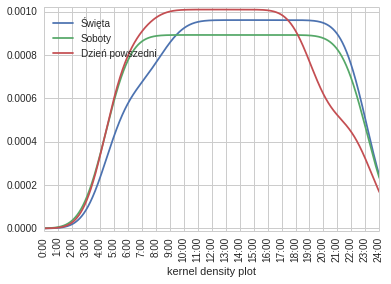

In [305]:
wykresik1(get_plan("0004t013.htm"))

In [162]:
def show_timetable():
    """
    
        Funkcja wczytująca z wejścia informacje i wyświetlająca plan dla 
        danej linii z danego przystanku w danym kierunku
    
    """
    print "Podaj nr linii"
    line_nr = int(raw_input())
    if line_nr not in all_lines:
        print "Nie ma takiej linii!"
        return
    print "Podaj nazwę przystanku"
    stop = raw_input().decode('utf-8')
    if stop not in all_stops:
        print "Nie ma takiego przystanku!"
        return
    road = get_road_of_line(line_nr)
    if stop not in road:
        print "Ta linia nie przejeżdża przez ten przystanek!"
        return
    pocz, kon = road[0], road[-1]
    print "Wybierz relację:"
    print pocz + " -> " + kon + " (1)"
    print kon + " -> " + pocz + " (2)"
    rel = int(raw_input())
    stops = get_stops_by_line(line_nr, rel)
    
    line_str = str(line_nr)
    line_str = "0" * (4 - len(line_str)) + line_str
    prefix = domain + "aktualne/" + line_str + "/"
    stop_url = [a[0] for a in stops if a[1] == stop][0]
    
    timetable = get_plan(stop_url)
    days = timetable.keys()[:]
    print "Wybierz dzień:"
    for k, i in zip(days, range(len(days))):
        print k + " (" + str(i + 1) + ")"
    d = int(raw_input())
    for h, m in timetable[days[d - 1]]:
        print str(h) + ":" + ("0" * (2 - len(str(m)))) + str(m)

In [163]:
show_timetable()

Podaj nr linii
52
Podaj nazwę przystanku
Dworzec Główny
Wybierz relację:
Czerwone Maki -> Os.Piastów (1)
Os.Piastów -> Czerwone Maki (2)
2
Wybierz dzień:
Święta (1)
Soboty (2)
Dzień powszedni (3)
3
4:54
5:15
5:35
5:55
6:05
6:14
6:19
6:25
6:31
6:35
6:41
6:46
6:51
6:56
7:01
7:06
7:11
7:16
7:21
7:26
7:31
7:36
7:41
7:46
7:51
7:56
8:01
8:06
8:11
8:16
8:21
8:26
8:31
8:36
8:41
8:46
8:51
8:56
9:03
9:09
9:14
9:22
9:29
9:34
9:43
9:53
10:03
10:11
10:21
10:31
10:41
10:51
11:01
11:11
11:21
11:31
11:41
11:51
12:01
12:12
12:22
12:32
12:42
12:52
13:02
13:12
13:22
13:32
13:42
13:52
14:02
14:12
14:17
14:22
14:27
14:32
14:37
14:42
14:47
14:52
14:57
15:02
15:07
15:12
15:17
15:22
15:27
15:32
15:37
15:42
15:47
15:52
15:57
16:02
16:07
16:12
16:17
16:22
16:27
16:32
16:37
16:42
16:47
16:52
16:57
17:02
17:07
17:12
17:17
17:22
17:27
17:32
17:37
17:42
17:49
17:55
18:02
18:06
18:11
18:16
18:21
18:26
18:31
18:36
18:41
18:46
18:56
19:06
19:16
19:26
19:37
19:57
20:17
20:37
20:57
21:17
21:37
21:57
22:17
22:37
22:57
23

In [197]:
def show_timetable_by_stop():
    """
    
    Funkcja wczytująca z wejścia informacje i wyświetlająca pełny plan z danego przystanku
    Lepiej nie testować na przystanku z dużą liczbą połączeń, np. Dworzec Główny, bo się dość długo liczy
    
    """
    print "Podaj nazwę przystanku"
    stop = raw_input().decode('utf-8')
    if stop not in all_stops:
        print "Nie ma takiego przystanku!"
        return
    
    timetable = {}
    
    for line, end, url in get_lines_by_stop_with_urls(stop):
        plan = get_plan(url.split("/")[-1].replace("r", "t"))
        for k in plan.keys():
            if k not in timetable.keys():
                timetable[k] = []
            for t in plan[k]:
                timetable[k].append((t, line, end))
    
    print timetable

In [196]:
show_timetable_by_stop()

Podaj nazwę przystanku
Dworzec Główny
{u'Wszystkie dni tygodnia': [((23, 54), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((0, 50), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((1, 50), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((2, 50), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((3, 50), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((4, 24), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((5, 24), u'902', u'Dworzec G\u0142\xf3wny Wsch\xf3d'), ((23, 27), u'902', u'Krak\xf3w Airport'), ((0, 7), u'902', u'Krak\xf3w Airport'), ((1, 7), u'902', u'Krak\xf3w Airport'), ((2, 7), u'902', u'Krak\xf3w Airport'), ((3, 7), u'902', u'Krak\xf3w Airport'), ((4, 7), u'902', u'Krak\xf3w Airport'), ((0, 0), u'610', u'Pr\u0105dnik Czerwony'), ((1, 0), u'610', u'Pr\u0105dnik Czerwony'), ((2, 0), u'610', u'Pr\u0105dnik Czerwony'), ((3, 0), u'610', u'Pr\u0105dnik Czerwony'), ((4, 0), u'610', u'Pr\u0105dnik Czerwony'), ((4, 30), u'610', u'Pr\u0105dnik Czerwony'), ((0, 0), u'608', u'Pod Fortem'), 

In [335]:
def count_voyages():
    """
        zwraca dicta z numerami linii w kluczach i dictem z liczbami połączeń dla danego typu dnia
    """
    voyages = {}
    for line_nr in all_lines:
        print line_nr,
        url = get_stops_by_line(line_nr)[0][0]
        timetable = get_plan(url)
        for k in timetable.keys():
            timetable[k] = len(timetable[k])
        voyages[line_nr] = timetable
    return voyages

In [336]:
v = count_voyages()

1 2 3 4 5 6 7 8 9 11 12 13 14 16 18 19 20 21 22 23 24 50 52 70 62 64 69 100 101 102 103 105 106 107 109 110 111 112 113 115 117 118 120 122 123 124 125 127 128 129 130 131 132 133 134 135 137 138 139 141 142 143 144 145 151 152 153 154 155 158 159 161 162 163 164 166 168 169 171 172 173 174 175 178 179 181 182 183 184 193 194 201 202 203 204 207 208 209 210 211 212 213 214 215 217 218 220 221 222 223 224 225 226 227 229 230 232 233 235 237 238 239 240 242 243 244 245 247 248 249 250 252 253 255 257 258 259 260 263 265 267 268 269 270 273 275 277 278 280 283 285 287 292 297 301 304 405 409 422 424 429 439 451 482 501 502 503 504 572 601 605 608 610 611 637 642 643 662 664 669 710 902 903 904 915


In [341]:
"""
    coś co utrudnia zrobienie fajnych statystyk
"""

s = set()
for k in v.keys():
    for l in v[k].keys():
        s.add(l)
s = list(s)
for n in s: print n;

Wszystkie dni tygodnia
Dzień powszedni
Pon/Wt - Czw/Pt
Pt/Sob-Sob/Nd
Czw/Pt
Soboty
Pon/Wt, Wt/Śr, Śr/Czw
Święta
Nd/Pon


In [344]:
def get_end_stops():
    end_stops = set()
    for line_nr in all_lines:
        print line_nr,
        road = get_road_of_line(line_nr)
        end_stops.add(road[0])
        end_stops.add(road[-1])
    return list(end_stops)

In [345]:
all_end_stops = get_end_stops()

1 2 3 4 5 6 7 8 9 11 12 13 14 16 18 19 20 21 22 23 24 50 52 70 62 64 69 100 101 102 103 105 106 107 109 110 111 112 113 115 117 118 120 122 123 124 125 127 128 129 130 131 132 133 134 135 137 138 139 141 142 143 144 145 151 152 153 154 155 158 159 161 162 163 164 166 168 169 171 172 173 174 175 178 179 181 182 183 184 193 194 201 202 203 204 207 208 209 210 211 212 213 214 215 217 218 220 221 222 223 224 225 226 227 229 230 232 233 235 237 238 239 240 242 243 244 245 247 248 249 250 252 253 255 257 258 259 260 263 265 267 268 269 270 273 275 277 278 280 283 285 287 292 297 301 304 405 409 422 424 429 439 451 482 501 502 503 504 572 601 605 608 610 611 637 642 643 662 664 669 710 902 903 904 915 Lesisko
Os.Podwawelskie
Pod Fortem
Krzysztoforzyce
Dworzec Główny Zachód
Bronowice
Zakamycze
Górna Wieś
EC Łęg
Krzęcin Pętla
Os.Piastów
Mydlniki
Dąbie
Łososkowice
Wieczysta
Kopanka Pętla
Zastów
Skawina PKP
Kleszczów
Nielepice
Grabówki
Chrosna Pętla
Kamień
Wieliczka Kampus
Konary
Wolica Most
Rzes

In [347]:
for es in all_end_stops: print es;
print len(all_end_stops)

Lesisko
Os.Podwawelskie
Pod Fortem
Krzysztoforzyce
Dworzec Główny Zachód
Bronowice
Zakamycze
Górna Wieś
EC Łęg
Krzęcin Pętla
Os.Piastów
Mydlniki
Dąbie
Łososkowice
Wieczysta
Kopanka Pętla
Zastów
Skawina PKP
Kleszczów
Nielepice
Grabówki
Chrosna Pętla
Kamień
Wieliczka Kampus
Konary
Wolica Most
Rzeszotary Panciawa Pętla
Bieżanów
Przylasek Rusiecki
Powstańców Wielkopolskich
Zajezdnia Płaszów
Bagry
Wróżenice
Grabie
Trojanowice Pętla
Nowy Bieżanów
Ochodza Odwiśle
Niepołomice Dworzec
Czerwone Maki
Górka Narodowa
Kopiec Wandy
Węgrzce Pętla
Radzikowskiego Osiedle
Witkowice
Krzeszowice
Lusina Pętla
Czyżyny Dworzec
Czernichów
Cmentarz Rakowicki
Soboniowice
Kraków Airport
Ujazd Pętla
Olszanica
Bardosa
Swoszowice Poczta
Prokocim Szpital
Zesławice
Azory
Ochojno Remiza
Rżąka 
ZOO
Brzeźnica
Rondo Kocmyrzowskie im. Ks. Gorzelanego
Kujawy
Os.Kurdwanów
Tyniec Kamieniołom
Plac Centralny im. R.Reagana
Młynka Pętla
Salwator
Kopiec Kościuszki
Skawina
Nowy Bieżanów Południe
Wydział Farmaceutyczny UJ
Dworzec Pł